**<h2> New York City Airbnb Exploratory Data Analysis </h2>**



![picture](https://drive.google.com/uc?id=1SX_4v71xIsyo44w6Jj_seoT4HVdtGyhn)

# **A) Background**



**Context**

*Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.*

**Content**

*This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.*

**Acknowledgements**

*This public dataset is part of Airbnb, I pulled this data from Kaggle
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data*


**Some Questions to answer :**

1) What can we learn about different hosts and areas?

2) What can we learn from predictions? (ex: locations, prices, reviews, etc)

3) Which hosts are the busiest and why?

4) Is there any noticeable difference of traffic among different areas and what could be the reason for it? 

# **B)   Import the Libraries :**

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

# **C) Get the Data (Read the .csv file) :**

In [40]:
data = pd.read_csv('/content/AB_NYC_2019.csv')

# **D) Let's explore the data :** 

**<h3> </h3>**

      i.   Data Overview
      ii.  No. of Records & Features
      iii. Summary & info
      iv. Conclusion

**i. Data Overview :**

In [41]:
# Top 5 records :

data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**ii.  No. of Records & Features :**

In [42]:
# Let's know our features:

print('SHAPE OF OUR DATASET :',data.shape)

print('\n WHAT ARE OUR FEATURES ? : \n',data.columns)



SHAPE OF OUR DATASET : (48895, 16)

 WHAT ARE OUR FEATURES ? : 
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


**OBSERVATION :**

1) There are around 48895 records in our dataset.

2) We have 16 features :

    id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365

**iii.  Descriptive Summary**

In [43]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [44]:
# INFO

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**iv. Conclusion :**


* We have total 16 features, out of which 
   "*last_review*", "*name*","*host_name*" are least important in my opinion. (So we'll ignore it)

* Factors/Metrics  to look into 

        a) price   b) number_of_reviews   c) reviews_per_month  d) availability_365  e) calculated_host_listings_count 

* We can group the data based on 

        a) host_id, host_name   b) neighbourhood_group   c) neighbourhood   d) room_type

* We can utilise Longitude & Latitude values for geospatial visualization 

* We have some features with *null* values.



# **E)   Data Wrangling :**

**<h3>  </h3>**

    i. Duplicate Values
    ii. Missing Values

**i.  Duplicate Values :**

In [45]:
# For [id] :

print("Total no. of id values :", data['id'].count())
print("No. of unique id values :",len(data['id'].unique()))

# For [name] :

print("\nTotal no. of name values : ",data['name'].count())
print("No. of unique name values : ",len(data['name'].unique()))

# For [host_id] :

print("\nTotal no. of host_id values :", data['host_id'].count())
print("No. of unique host_id values :",len(data['host_id'].unique()))

# For [host_name] :

print("\nTotal no. of host_name values : ",data['host_name'].count())
print("No. of unique host_name values : ",len(data['host_name'].unique()))

Total no. of id values : 48895
No. of unique id values : 48895

Total no. of name values :  48879
No. of unique name values :  47906

Total no. of host_id values : 48895
No. of unique host_id values : 37457

Total no. of host_name values :  48874
No. of unique host_name values :  11453


**Observation** : 

* As we can see, we have some duplicate records when it comes to '*name*' & '*host_name*'

* We don't need these 3 features: 

      a) name    b) host_name   c) last_review

      So, we'll drop these features.

* Also, we even have null values in this features & they don't seem really helpful. So, let's drop them.

**# Drop these 3 features in our DataFrame**

In [46]:
# Drop the features from the dataframe

cleaned_data = data.drop(['name','host_name','last_review'], axis=1)

cleaned_data

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


**ii.  Missing Values :**

In [48]:
# Find the missing / NaN values :

print(cleaned_data.isnull().sum())

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


**Observation :** 

* There's just 1 feature with huge no. of missing values i.e. *reviews_per_month*

* Let's replace this missing values with '0'

In [49]:
# Fill the missing values :

cleaned_data.fillna(value = 0,inplace = True)

In [50]:
# New Cleaned Data

cleaned_data

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


# **F) Exploratory Data Analysis :**


    i.     Host
    ii.    price
    iii.   room_type
    iv.    Area (neighborhood, neighborhood_group)
    v.     availability_365

**<h3>i.  Host </h3>**

* Who are the busiest hosts?
* Which areas do these hosts cater to ?

In [69]:
cleaned_data['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

***Q1 . Who is the most busiest host in New York City?***



In [70]:
cleaned_data['host_id'].mode() 

0    219517861
dtype: int64

**Observation :**  

* *'219517861'* is the most busiest host

* *'107434423', '30283594', '137358866', '12243051'* are the other top hosts

In [71]:
top_hosts = [219517861,107434423,30283594,137358866,12243051]

top_hosts

[219517861, 107434423, 30283594, 137358866, 12243051]

In [132]:
print('Top Hosts Name : \n')

for i in top_hosts:
    print(data[data['host_id'] == i].host_name.unique())

Top Hosts Name : 

['Sonder (NYC)']
['Blueground']
['Kara']
['Kazuya']
['Sonder']


***Q2.  What are the areas these busiest hosts belong to ?***

In [72]:
features = ['host_id','neighbourhood_group']

busiest_hosts = cleaned_data[cleaned_data['host_id'].isin(top_hosts)]

busiest_hosts_areas = busiest_hosts.loc[:,['host_id','neighbourhood_group']]
busiest_hosts_areas.drop_duplicates(inplace = True)

busiest_hosts_areas


,host_id,neighbourhood_group
9740,30283594,Manhattan
26137,107434423,Manhattan
30637,12243051,Manhattan
32718,137358866,Manhattan
33268,137358866,Queens
36698,137358866,Brooklyn
38293,219517861,Manhattan
39275,107434423,Brooklyn


Observation :

* *'Sonder (NYC) ',' Blueground ',' Kara ',' Kazuya ',' Sonder '*   are the busiest hosts.

* These busiest hosts mostly belong to *Manhattan, Brooklyn & Queens*.

**<h3>ii.  Price </h3>**

* Price distribution
* Median Price in $
* Price Statistic 
* At what price do the busiest/top hosts offer their services?
* Prices across different regions

In [28]:
prices_df = cleaned_data.loc[:,['id','host_id','neighbourhood_group','price']]

prices_df

,id,host_id,neighbourhood_group,price
0,2539,2787,Brooklyn,149
1,2595,2845,Manhattan,225
2,3647,4632,Manhattan,150
3,3831,4869,Brooklyn,89
4,5022,7192,Manhattan,80
...,...,...,...,...
48890,36484665,8232441,Brooklyn,70
48891,36485057,6570630,Brooklyn,40
48892,36485431,23492952,Manhattan,115
48893,36485609,30985759,Manhattan,55


\# **Price Distribution :**

(0.0, 1000.0)

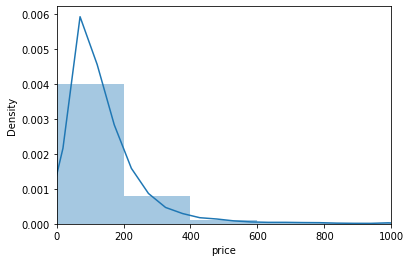

In [36]:
sns.distplot(prices_df['price'])

plt.xlim(0, 1000)

\# **Median Price in $ :**

In [51]:
print('Median Price ',prices_df['price'].median())

Median Price  106.0


\# **Price Statistic :**

(0.0, 1000.0)

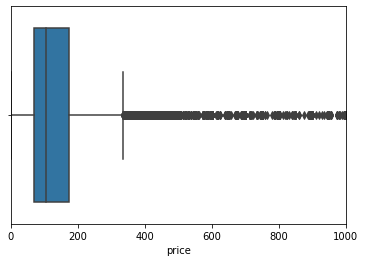

In [62]:
sns.boxplot(x = prices_df['price'])
plt.xlim(0,1000)

In [63]:
# Percentile values :

print('\n25th percentile :',prices_df['price'].quantile(q=0.25))
print('\n50th percentile :',prices_df['price'].quantile(q=0.5))
print('\n75th percentile :',prices_df['price'].quantile(q=0.75))
print('\n99th percentile :',prices_df['price'].quantile(q=0.99))




25th percentile : 69.0

50th percentile : 106.0

75th percentile : 175.0

99th percentile : 799.0


**Observation :**

* Mostly the prices lies between \$ 69    &  \$ 175 
* Median price across all of New York City is $ 106
* Also, our price data contains huge amount of outliers (which is why we used Median in place of Averages/Mean value)

\# **At what price do the busiest/top hosts offer their services?**

In [56]:
busiest_hosts_prices = busiest_hosts.loc[:,['host_id','price']]

busiest_hosts_prices

,host_id,price
9740,30283594,169
10075,30283594,135
10335,30283594,369
10398,30283594,335
10490,30283594,129
...,...,...
48723,107434423,316
48724,107434423,385
48725,107434423,267
48726,107434423,278


(0.0, 1000.0)

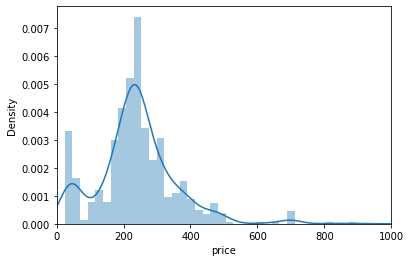

In [57]:
sns.distplot(busiest_hosts_prices['price'])

plt.xlim(0, 1000)

(0.0, 450.0)

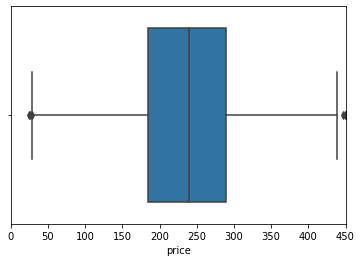

In [67]:
sns.boxplot(x = busiest_hosts_prices['price'])
plt.xlim(0,450)

In [68]:
# Percentile values :

print('\n25th percentile :',busiest_hosts_prices['price'].quantile(q=0.25))
print('\n50th percentile :',busiest_hosts_prices['price'].quantile(q=0.5))
print('\n75th percentile :',busiest_hosts_prices['price'].quantile(q=0.75))
print('\n99th percentile :',busiest_hosts_prices['price'].quantile(q=0.99))


25th percentile : 185.0

50th percentile : 239.0

75th percentile : 289.0

99th percentile : 699.0


**Observation :**

* Turns out that the Busiest host's in New York City cost a little more expensive than others. i.e. between \$ *185* & \$ *289*


\# **Prices across different regions :**



(0.0, 500.0)

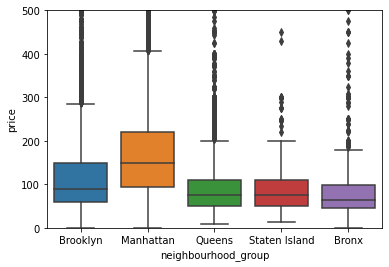

In [64]:
sns.boxplot(x="neighbourhood_group", y="price", data = prices_df)
plt.ylim(0,500)

**Observation :**

* Manhattan is the most expensive area. (highest price)
* Manhattan & Brooklyn turns out to be the most expensive areas.
* Rest, { Queens, Staten Island, Bronx } have similar prices and are cheaper than Manhattan & Brooklyn.

**<h3>iii.  Room Type : </h3>**

* Which room types are more popular?
* Which room types are more cheaper than others?

In [73]:
roomtype_df = cleaned_data.loc[:,['id','room_type','price']]

roomtype_df

,id,room_type,price
0,2539,Private room,149
1,2595,Entire home/apt,225
2,3647,Private room,150
3,3831,Entire home/apt,89
4,5022,Entire home/apt,80
...,...,...,...
48890,36484665,Private room,70
48891,36485057,Private room,40
48892,36485431,Entire home/apt,115
48893,36485609,Shared room,55


\# **Popularity of different room_types :**

In [82]:
print('Distribution of Room Types : \n\n',roomtype_df['room_type'].value_counts())

Distribution of Room Types : 

 Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


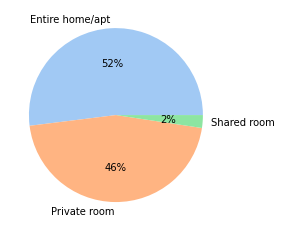

In [85]:
# Visualize the above result in form of pie-chart :

count = [25409,22326,1160]
labels = ['Entire home/apt','Private room','Shared room']
colors = sns.color_palette('pastel')
plt.pie(count, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()


**Observation :**

* As we can clearly see, '*Entire home/apt*' and '*Private room*' are the more popular room types.
* Shared room is the least preffered room type contributing to just 2 % of all bookings.

\# **Price of different room_types**

(0.0, 500.0)

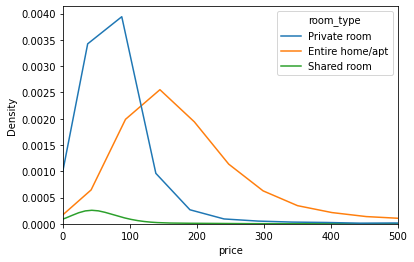

In [75]:
sns.kdeplot(data = roomtype_df, x="price", hue="room_type")
plt.xlim(0,500)

(0.0, 500.0)

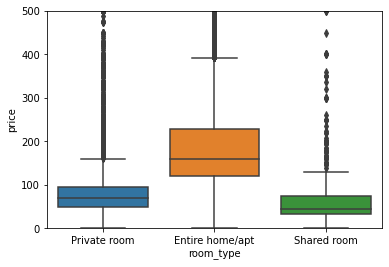

In [77]:
sns.boxplot(x="room_type", y="price", data = roomtype_df)
plt.ylim(0,500)

**Observation :**

* "Entire Home/Apt" is the most expensive room type.
* "Private Room" & "Shared Room" are almost comparable in terms of Price.
* "Shared Room" is the cheapest room type.

**<h3>iv.  Area (neighbourhood_group, neighbourhood): </h3>**

* Which are the most busiest/popular areas in New York City?

In [86]:
neighbour_group = cleaned_data.groupby(by='neighbourhood_group')

neighbour_group

In [90]:
neighbour_group.describe()

id                              ... availability_365              
                       count          mean           std  ...              50%    75%    max
neighbourhood_group                                       ...                               
Bronx                 1091.0  2.273492e+07  1.023402e+07  ...            148.0  313.5  365.0
Brooklyn             20104.0  1.825685e+07  1.083320e+07  ...             28.0  188.0  365.0
Manhattan            21661.0  1.877494e+07  1.116793e+07  ...             36.0  230.0  365.0
Queens                5666.0  2.175500e+07  1.037687e+07  ...             98.0  286.0  365.0
Staten Island          373.0  2.159747e+07  1.039310e+07  ...            219.0  333.0  365.0

[5 rows x 80 columns]

In [91]:
neighbour_group['id'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

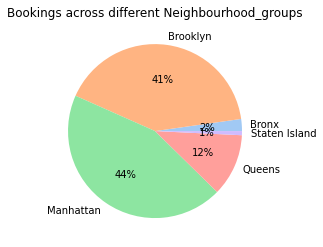

In [99]:
g = dict(neighbour_group['id'].count())

keys = list(g.keys())
values = list(g.values())

plt.title('Bookings across different Neighbourhood_groups')
colors = sns.color_palette('pastel')
plt.pie(values, labels=keys, colors = colors, autopct = '%0.0f%%')
plt.show()

**Observation :**

* Manhattan & Brooklyn are the busiest areas (neighbourhood_group). These two contributes to around 85 % of the total traffic

**<h3>vi. Availability_365 :</h3>**

\# ***Availability across all hosts :***

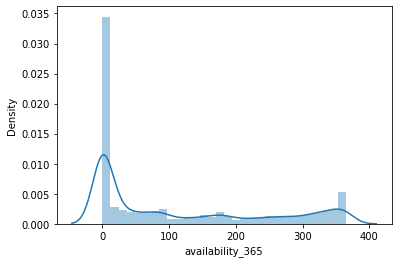

In [109]:
sns.distplot(cleaned_data['availability_365'])

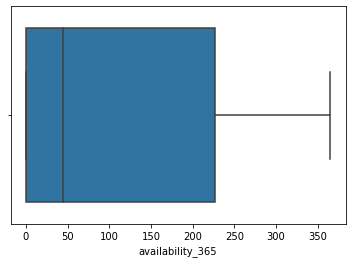

In [110]:
sns.boxplot(x=cleaned_data['availability_365'])

In [111]:
# Percentile values :

print('\n25th percentile :',cleaned_data['availability_365'].quantile(q=0.25))
print('\n50th percentile :',cleaned_data['availability_365'].quantile(q=0.5))
print('\n75th percentile :',cleaned_data['availability_365'].quantile(q=0.75))
print('\n99th percentile :',cleaned_data['availability_365'].quantile(q=0.99))


25th percentile : 0.0

50th percentile : 45.0

75th percentile : 227.0

99th percentile : 365.0


**Observation :**

* Most of the Airbnb host's offer their services for over 0 to 227 days in a year.

\# **Availability across the busiest hosts :**

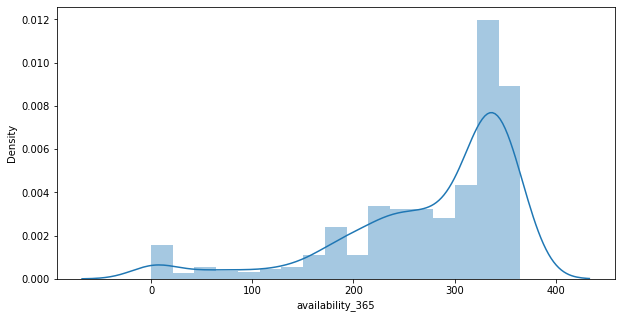

In [135]:
sns.distplot(busiest_hosts['availability_365'])
rcParams['figure.figsize'] = 7,5

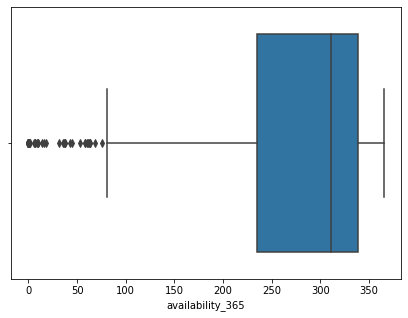

In [136]:
sns.boxplot(x=busiest_hosts['availability_365'])

In [137]:
# Percentile values :

print('\n25th percentile :',busiest_hosts['availability_365'].quantile(q=0.25))
print('\n50th percentile :',busiest_hosts['availability_365'].quantile(q=0.5))
print('\n75th percentile :',busiest_hosts['availability_365'].quantile(q=0.75))
print('\n99th percentile :',busiest_hosts['availability_365'].quantile(q=0.99))


25th percentile : 235.0

50th percentile : 311.0

75th percentile : 339.0

99th percentile : 365.0


**Observation :**

* The busiest Airbnb host's offer their services for over 235 to 339 days in a year.

# **G) Correlation between Features :**

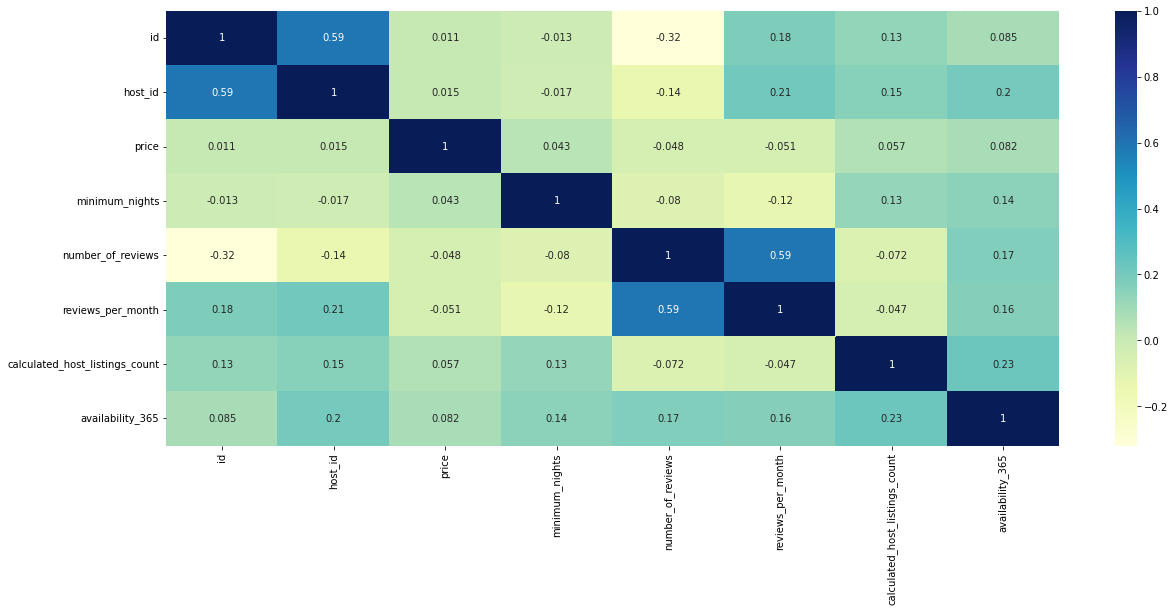

In [127]:
new_df = cleaned_data.drop(['longitude','latitude'], axis=1)

corr_df = new_df.corr()

sns.heatmap(corr_df, cmap="YlGnBu", annot=True)
rcParams['figure.figsize'] = 18,8
plt.show()

# **H)   Conclusion :**

* Our Dataset contained 48,895 Airbnb booking records around New York City for the year of 2019.

* We were provided with 16 features, out of which we used some of the features for the purpose of analysis.

* *'Sonder (NYC) ',' Blueground ',' Kara ',' Kazuya ',' Sonder '*   are the busiest hosts. These hosts cater around *Manhattan* & *Brooklyn* areas.

* Manhattan & Brooklyn are the most popular areas in New York City with the busiest traffic. These areas are also the most expensive ones. (contributing to 85% of the total traffic)

* Manhattan is the most expensive area.

* 'Entire home/Apt' and 'Private room' are the most preffered room categories.

* 'Entire home/Apt' is the most expensive room category.

* 'Shared rooms' are hardly booked(only 2% out of total bookings), even though it is the cheapest room category.

* While most of the Airbnb host's offer their services for over 0 to 227 days in a year. 
The busiest Airbnb hosts offer their services from 235 to 339 days in a year. (which is so much more than other hosts)


# **I) Recommendation :**

* Customers surely seems to value **'quality experience'**  over **'money'**. So, Airbnb should advise their hosts to prioitize on providing a high quality experience & then later align their prices.

* **Manhattan**, **Brooklyn** and **Queens** receives the best traffic among all the neighbourhood areas. So, Airbnb should find more hosts catering to these areas.

* **'Shared Rooms'** don't get much customer traffic. So it would be a wise idea to remove this room category from the Airbnb services.